In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [9]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [30]:
# x는 (60000,784) 0~1로 만들기
X_train=x_train.reshape(60000,784)
X_train= X_train.astype('float32')
X_train/=255

X_test=x_test.reshape(10000,784)
X_test= X_test.astype('float32')
X_test/=255

In [26]:
#y는(60000,10)으로 카테고리 분류
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [31]:
model=Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 53581

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2301 - accuracy: 0.9330
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - accuracy: 0.9740
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0377 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9958

In [34]:
score=model.evaluate(X_test, Y_test)
print(score[0], score[1])

313/313 [==============================] - 0s 817us/step - loss: 0.0942 - accuracy: 0.9773
0.09416346997022629 0.9772999882698059


In [54]:
#모델 예측값과 실제값이 같은거는 good, 다른거는 bad에 넣기
predict=np.argmax(model.predict(X_test), axis=1)
good=np.nonzero(predict==y_test)[0]
bad=np.nonzero(predict!=y_test)[0]

313/313 [==============================] - 0s 506us/step


In [58]:
good[:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

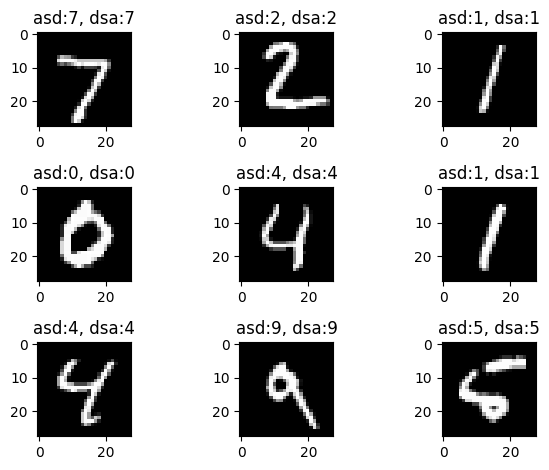

In [61]:
#good인 경우에 대해서 plt로 결과값 확인하기 / 가로 3, 세로 3 / 입력값불러와서 그려주기
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct= good[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("asd:{}, dsa:{}".format(predict[correct], y_test[correct]))
plt.tight_layout()


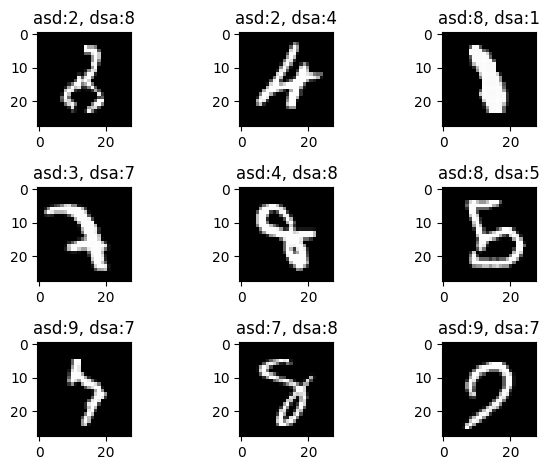

In [67]:
#bad인 경우에 대해서 plt로 결과값 확인하기 / 가로 3, 세로 3 / 입력값불러와서 그려주기
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    non_correct= bad[9+i]
    plt.imshow(X_test[non_correct].reshape(28,28), cmap='gray')
    plt.title("asd:{}, dsa:{}".format(predict[non_correct], y_test[non_correct]))
plt.tight_layout()
